1. Знайдіть функцію Гамільтона системи, для якої функція Лагранжа має вигляд

$$L = x^2 \dot{x}^2 - F x - \alpha x^2$$

Напишіть рівняння Ейлера-Лагранжа і Гамільтона, впевніться в їх еквівалентності.

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [2]:
# Объявление переменных и функций

t = var("t")

V = var("v")
v = function("v")(t)

X = var("x")
x = function("x")(t)

P = var("p")
p = function("p")(t)

alpha = var("alpha")
F = var("F")

In [3]:
L = x^2 * x.diff(t)^2 - F * x - alpha * x^2
displ("L = " + latex(L))

<IPython.core.display.Math object>

Найдем обобщенные импульсы

$P = \frac{\partial L}{\partial \dot{x}} = \frac{\partial L}{\partial {v}}$

In [4]:
P1 = L.subs(x.diff(t) == V).diff(V).subs(V == v)
disp(P1)

<IPython.core.display.Math object>

Найдем обобщенные силы

$\frac{\partial L}{\partial {x}} = F$

In [5]:
F1 = L.subs(x == X).diff(X).subs(X == x)
disp(F1)

<IPython.core.display.Math object>

Запишем уравнения Эйлера-Лагранжа

$\frac{d}{dt}\frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial {x}} = 0$

In [6]:
de1 = P1.diff(t) - F1 == 0
disp(de1)

<IPython.core.display.Math object>

Выразим энергию через Лагранжиан

$E = \Sigma_{i}^{} \frac {\partial L}{\partial \dot{q}_i} \frac {q_i}{dt} - L$

In [7]:
E = P1 * v - L
disp (E)

<IPython.core.display.Math object>

# Интегрирование уравнений Гамильтона

In [8]:
# Объявление переменных - обобщенные импульсы

p_x = var ("p_x")

In [9]:
# Записываем уравнения выражающие обобщенные импульсы
# через производные Лагранжиана по скорости изменения обобщенной координаты (по v)

eq_p_v = [p_x == L.subs(x.diff(t) == V).diff(V)]
disp(eq_p_v[0])

<IPython.core.display.Math object>

In [10]:
# Ищем выражение для v через обобщенные импульсы, решая вышесозданную систему уравнений

sol_v_p = solve(eq_p_v, [V])
disp(sol_v_p)

<IPython.core.display.Math object>

In [11]:
# Находим выражение для Гамильтониана исходя из
# выражения энергии через Лагранжиан
# используя вышенайденную подстановку, выражающую omega через обобщенные импульсы и координаты

H = (p_x * V - L).subs(x.diff(t) == V).subs(sol_v_p).subs(x == X)
displ("H = " + latex(H))

<IPython.core.display.Math object>

Записываем уравнения Гамильтона

$\dot{p}_i = - \frac{\partial H}{\partial x_i}$

$\dot{x}_i = \frac{\partial H}{\partial p_i}$

In [12]:
dot_px = - H.diff(X)
dot_x =   H.diff(p_x)

In [13]:
displ("\\dot{p}_x =" + latex(dot_px))

<IPython.core.display.Math object>

In [14]:
displ("\\dot{x} =" + latex(dot_x))

<IPython.core.display.Math object>

In [15]:
# сравниваем с уравнениями Эйлера-Лагранжа
disp(de1)

<IPython.core.display.Math object>

In [16]:
# полученные уравнения Гамильтона обьединяем в систему из 2 уравнений
des = [dot_px, dot_x]
disp(des)

<IPython.core.display.Math object>

In [17]:
values1 = [F == 0.01, alpha == 0.001]
values1

[F == 0.0100000000000000, alpha == 0.00100000000000000]

In [18]:
# в которой делаем подстановку численных значений
f1 = [de_i.subs(values1) for de_i in des]
disp(f1)

<IPython.core.display.Math object>

In [19]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times1 = srange(0, 0.0000425, 0.0000001)

p0 = 0
x0 = 0.0001

sol1 = desolve_odeint(des=f1, ics=[p0,x0], times=times1, dvars=[p_x, X], ivar=t)

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


# Построение фазовых диаграмм ($p(x)$)

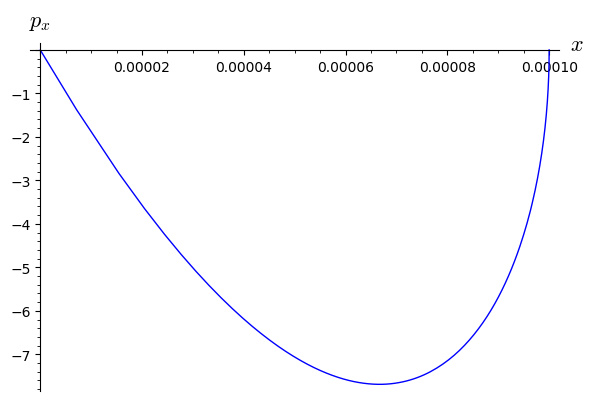

In [20]:
p = line(zip(sol1[:,1],sol1[:,0]), axes_labels=['$x$','$p_x$',])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

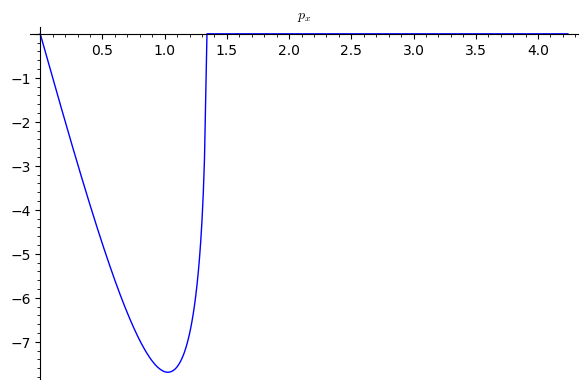

In [21]:
p = line(zip(times1,sol1[:,0]))
p.show(title="$p_x$")

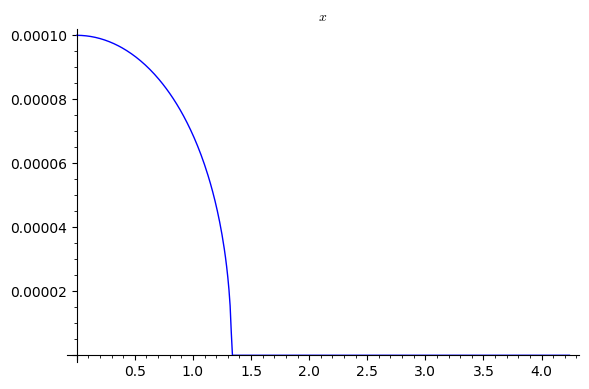

In [22]:
p = line(zip(times1,sol1[:,1]))
p.show(title="$x$")

# Новые значения численных коэффициентов

In [23]:
values2 = [F == -0.01, alpha == 0.001]
values2

[F == -0.0100000000000000, alpha == 0.00100000000000000]

In [24]:
# в которой делаем подстановку численных значений
f2 = [de_i.subs(values2) for de_i in des]
disp(f2)

<IPython.core.display.Math object>

In [25]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times2 = srange(0, 0.0000425, 0.0000001)

p0 = 0
x0 = 0.0001

sol2 = desolve_odeint(des=f2, ics=[p0,x0], times=times2, dvars=[p_x, X], ivar=t)

# Построение фазовых диаграмм ($p(x)$)

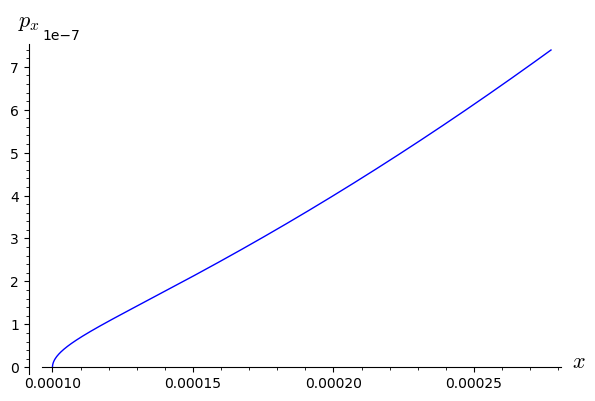

In [26]:
p = line(zip(sol2[:,1],sol2[:,0]), axes_labels=['$x$','$p_x$',])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

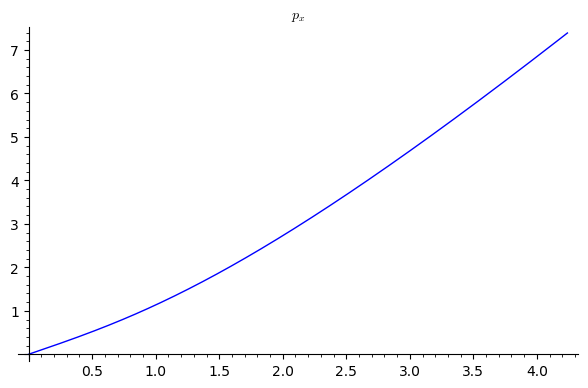

In [27]:
p = line(zip(times2,sol2[:,0]))
p.show(title="$p_x$")

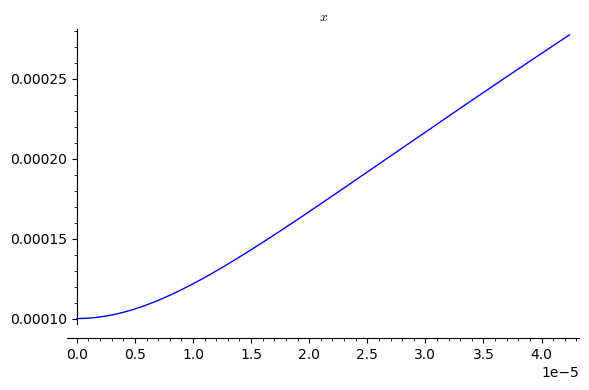

In [28]:
p = line(zip(times2,sol2[:,1]))
p.show(title="$x$")

# Новые значения численных коэффициентов

In [29]:
values3 = [F == +0.01, alpha == -0.001]
values3

[F == 0.0100000000000000, alpha == -0.00100000000000000]

In [30]:
# в которой делаем подстановку численных значений
f3 = [de_i.subs(values3) for de_i in des]
disp(f3)

<IPython.core.display.Math object>

In [31]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times3 = srange(0, 0.0000425, 0.0000001)

p0 = 0
x0 = 0.0001

sol3 = desolve_odeint(des=f3, ics=[p0,x0], times=times3, dvars=[p_x, X], ivar=t)

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.10/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


# Построение фазовых диаграмм ($p(x)$)

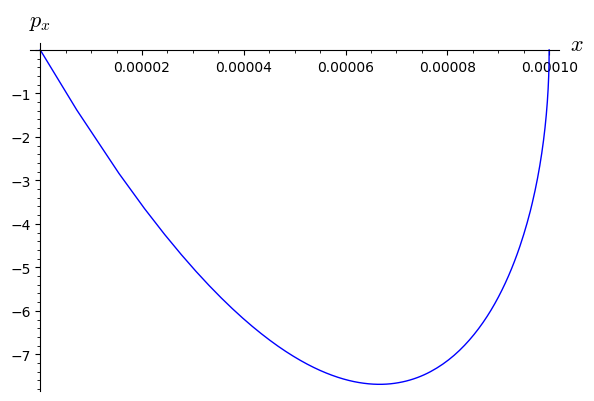

In [32]:
p = line(zip(sol3[:,1],sol3[:,0]), axes_labels=['$x$','$p_x$',])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

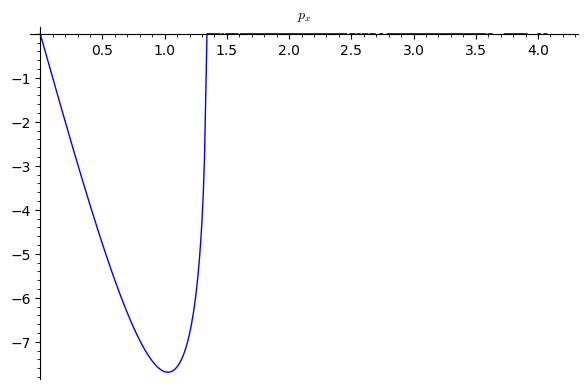

In [33]:
p = line(zip(times3,sol3[:,0]))
p.show(title="$p_x$")

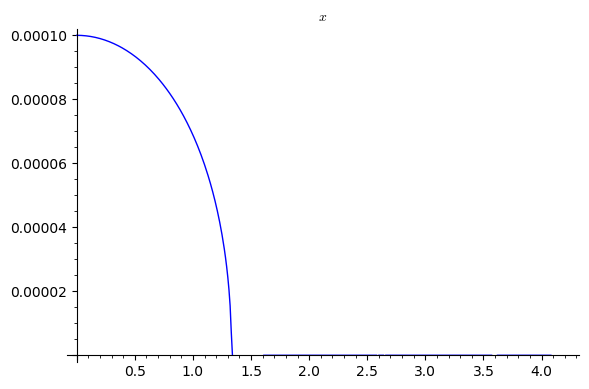

In [34]:
p = line(zip(times3,sol3[:,1]))
p.show(title="$x$")

# Новые значения численных коэффициентов

In [35]:
values4 = [F == -0.01, alpha == -0.001]
values4

[F == -0.0100000000000000, alpha == -0.00100000000000000]

In [36]:
# в которой делаем подстановку численных значений
f4 = [de_i.subs(values4) for de_i in des]
disp(f4)

<IPython.core.display.Math object>

In [37]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times4 = srange(0, 0.0000425, 0.0000001)

p0 = 0
x0 = 0.0001

sol4 = desolve_odeint(des=f4, ics=[p0,x0], times=times4, dvars=[p_x, X], ivar=t)

# Построение фазовых диаграмм ($p(x)$)

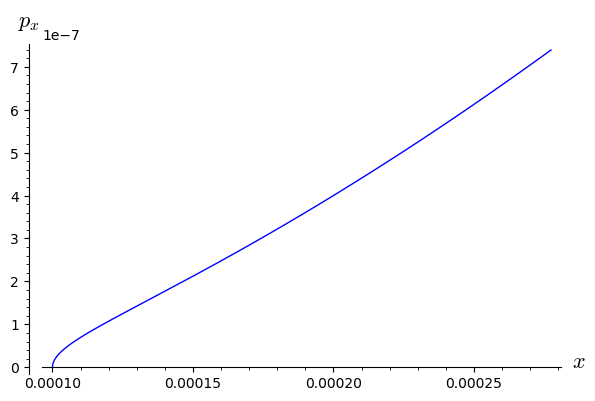

In [38]:
p = line(zip(sol4[:,1],sol4[:,0]), axes_labels=['$x$','$p_x$',])
p.show()

# Построение зависимости обобщённых координат и импульсов от времени

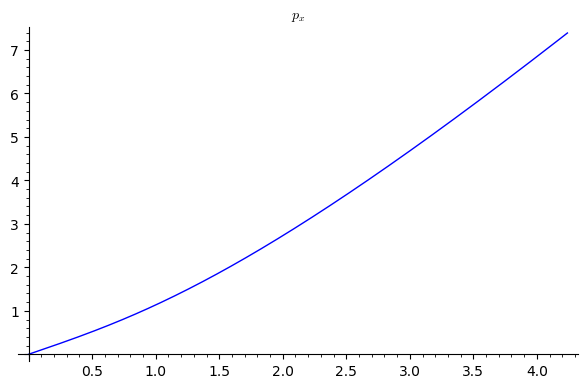

In [39]:
p = line(zip(times4,sol4[:,0]))
p.show(title="$p_x$")

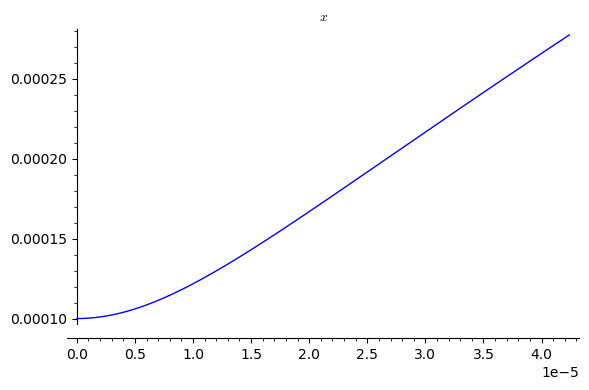

In [40]:
p = line(zip(times4,sol4[:,1]))
p.show(title="$x$")